## Collapsing things
### May 12, 2017

In [30]:
import numpy as np
import xarray as xr
import numpy.ma as ma
%matplotlib inline 
import netCDF4 as nc
from salishsea_tools import nc_tools as nc_tools
import matplotlib.pyplot as plt

In [5]:
day1u = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141218-20141218.nc')
day2u = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141219-20141219.nc')
day3u = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141220-20141220.nc')
day4u = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141221-20141221.nc')
day5u = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141222-20141222.nc')
day6u = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141223-20141223.nc')
day7u = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141224-20141224.nc')                      
day8u = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141225-20141225.nc')

day1v = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_V_20141218-20141218.nc')
day2v = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_V_20141219-20141219.nc')
day3v = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_V_20141220-20141220.nc')
day4v = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_V_20141221-20141221.nc')
day5v = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_V_20141222-20141222.nc')
day6v = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_V_20141223-20141223.nc')
day7v = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_V_20141224-20141224.nc')
day8v = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_V_20141225-20141225.nc')

day1w = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_W_20141218-20141218.nc')
day2w = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_W_20141219-20141219.nc')
day3w = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_W_20141220-20141220.nc')
day4w = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_W_20141221-20141221.nc')
day5w = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_W_20141222-20141222.nc')
day6w = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_W_20141223-20141223.nc')
day7w = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_W_20141224-20141224.nc')
day8w = xr.open_dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_W_20141225-20141225.nc')

u_files = [day1u,day2u,day3u,day4u,day5u,day6u,day7u,day8u]
v_files = [day1v,day2v,day3v,day4v,day5v,day6v,day7v,day8v]
w_files = [day1w,day2w,day3w,day4w,day5w,day6w,day7w,day8w]

mesh_mask = xr.open_dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
delta_x = mesh_mask.e1u
delta_y = mesh_mask.e2v
delta_z = mesh_mask.e3w_1d
t_mask = mesh_mask.tmask
u_mask = mesh_mask.umask
v_mask = mesh_mask.vmask                 

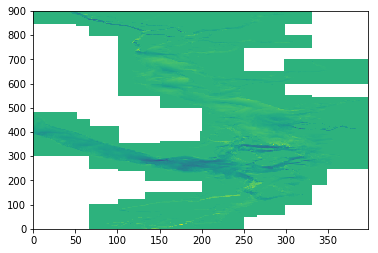

In [31]:
nc_u = nc.Dataset('/home/vdo/MEOPAR/completed-runs/VAT19/SalishSea_1h_20141218_20141225_grid_U_20141218-20141218.nc')
nc_mask = nc.Dataset('/home/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')
try_this = nc_u['vozocrtx'][1,:,:,:] / nc_mask['e1u']
fig,ax = plt.subplots(1,1)
ax.pcolormesh(try_this[1,:,:])

In [21]:
ubdx = np.zeros((40,898,398,1))
for file in u_files:
    for n in range(0,24):
        u = np.abs(file.vozocrtx.isel(time_counter=n) / delta_x)
        ubdx = np.maximum(u,ubdx)
new_u = np.zeros((898,398,1))
for m in range(0,40):
    u = ubdx.isel(depthu = m)
    new_u = np.maximum(u,new_u)
print(new_u)

/home/vdo/anaconda3/lib/python3.6/site-packages/xarray/core/variable.py:1143: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


<xarray.DataArray (y: 898, x: 398, t: 1)>
array([[[ nan],
        [ nan],
        ..., 
        [ nan],
        [ nan]],

       [[ nan],
        [ nan],
        ..., 
        [ nan],
        [ nan]],

       ..., 
       [[  0.],
        [  0.],
        ..., 
        [ nan],
        [ nan]],

       [[  0.],
        [  0.],
        ..., 
        [ nan],
        [ nan]]])
Coordinates:
    depthu         float32 441.466
    nav_lat        (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    nav_lon        (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    time_centered  datetime64[ns] 2014-12-25T23:30:00
    time_counter   datetime64[ns] 2014-12-25T23:30:00
Dimensions without coordinates: y, x, t


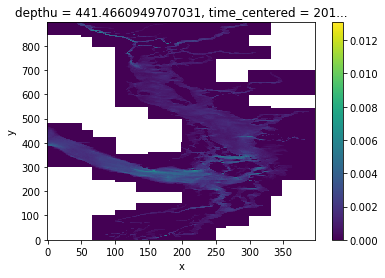

In [22]:
new_u.plot()

In [23]:
vbdx = np.zeros((40,898,398,1))
for file in v_files:
    for n in range(0,24):
        v = np.abs(file.vomecrty.isel(time_counter=n) / delta_y)
        vbdx = np.maximum(v,vbdx)
new_v = np.zeros((898,398,1))
for m in range(0,40):
    v = vbdx.isel(depthv = m)
    new_v = np.maximum(v,new_v)
print(new_v)

/home/vdo/anaconda3/lib/python3.6/site-packages/xarray/core/variable.py:1143: RuntimeWarning: invalid value encountered in true_divide
  if not reflexive


<xarray.DataArray (y: 898, x: 398, t: 1)>
array([[[ nan],
        [ nan],
        ..., 
        [ nan],
        [ nan]],

       [[ nan],
        [ nan],
        ..., 
        [ nan],
        [ nan]],

       ..., 
       [[  0.],
        [  0.],
        ..., 
        [ nan],
        [ nan]],

       [[  0.],
        [  0.],
        ..., 
        [ nan],
        [ nan]]])
Coordinates:
    depthv         float32 441.466
    nav_lat        (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    nav_lon        (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    time_centered  datetime64[ns] 2014-12-25T23:30:00
    time_counter   datetime64[ns] 2014-12-25T23:30:00
Dimensions without coordinates: y, x, t


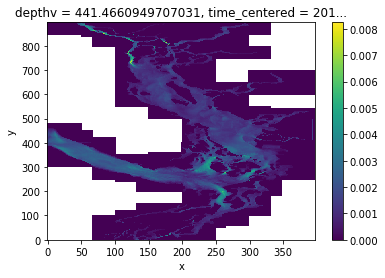

In [24]:
new_v.plot()

In [25]:
wbdx = np.zeros((40,898,398,1,40))
for file in w_files:
    for n in range(0,24):
        w = np.abs(file.vovecrtz.isel(time_counter=n) / delta_z)
        wbdx = np.maximum(w,wbdx)

new_w = np.zeros((40,898,398,1))
for m in range(0,40):
    w = wbdx.isel(z = m)
    new_w = np.maximum(w,new_w)

newer_w = np.zeros((898,398,1))
for l in range(0,40):
    tries = new_w.isel(depthw=l)
    newer_w = np.maximum(tries,newer_w)

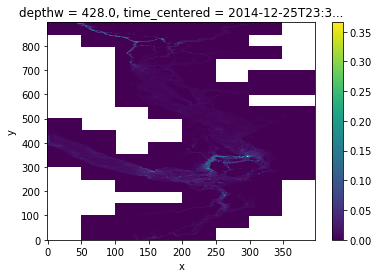

In [26]:
newer_w.isel(t=0).plot()